In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib import font_manager
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score,mean_absolute_error,mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost
import joblib

# 파일 합치기

In [5]:
# 보배드림
bo_df = pd.read_csv("보배드림 뉴스 크롤링.csv", lineterminator='\n')

In [6]:
bo_df = bo_df.dropna()

In [7]:
bo_df.reset_index()

,index,제목,내용,날짜,추천수,조회수\r
0,5,원자잿값 상승? “당분간 요소수 가격 재인상 없다”,"요소수 대란 6개월, 요소수 업계대란 후 가격 인상…추가 인상엔 ‘신중’“일부 요소...",09:26,0.0,17\r
1,6,"현대차, 제2회 `히어 커스터마이징 아이디어 공모전` 개최",(서울=연합뉴스) 김보경 기자 = 현대차는 고객 맞춤형 아이디어를 모집하는 '히어(...,09:24,0.0,11\r
2,7,"EV6 등 현대차그룹 전용 전기차, 내수 5만대·수출 10만대 돌파",인니서 아이오닉 5 인기·GV60 美시장 출시로 하반기 판매 확대 전망기아 EV6[...,09:21,0.0,6\r
3,8,"현대차, 울산공장에 LNG 열병합발전소 건설 추진",한전에서 받는 전력량 72% 자체 생산 계획현대차 울산공장[연합뉴스 자료사진](서울...,09:19,0.0,8\r
4,9,"""2028년까지 미래차 기술인력 약 4만명 더 필요…인재양성 시급""","자동차산업 인적자원개발위 ""내연기관차 부품 기업 2030년까지 500개 줄어""""한국...",09:17,0.0,3\r
...,...,...,...,...,...,...
2992,2999,"현대차그룹 `사회공헌활동 백서`, 미국 머큐리 어워즈 금상 수상",머큐리 어워즈 수상[현대차그룹 제공]\n \n(서울=연합뉴스) 최평천 기자 = 현대...,03/08,0.0,217\r
2993,3000,"현대모비스, 국내 13개 업체와 손잡고 `차량용 소프트웨어` 개발",공유오피스현대모비스는 서울 선릉역 인근에 협력사 개발자들이 모여 근무할 수 있는 공...,03/08,2.0,420\r
2994,3001,"`승승장구` 현대차 넥쏘, 국내 판매 36% 늘어…누적 1만1천417대",올해 넥쏘 생산량 지난해보다 2배 이상 늘리기로증산에도 생산직 고용 불안은 가중\n...,03/08,0.0,380\r
2995,3002,전남도 `자동차 튜닝` 선도기업 기술개발 적극 지원한다,전남도청[전남도 제공·재판매 및 DB 금지]\n \n(무안=연합뉴스) 여운창 기자 ...,03/08,0.0,177\r


In [8]:
bo_df = bo_df.rename(columns = {'제목':'title'})

In [9]:
bo_df = bo_df.reset_index()

In [10]:
bo_df.head()

,index,title,내용,날짜,추천수,조회수\r
0,5,원자잿값 상승? “당분간 요소수 가격 재인상 없다”,"요소수 대란 6개월, 요소수 업계대란 후 가격 인상…추가 인상엔 ‘신중’“일부 요소...",09:26,0.0,17\r
1,6,"현대차, 제2회 `히어 커스터마이징 아이디어 공모전` 개최",(서울=연합뉴스) 김보경 기자 = 현대차는 고객 맞춤형 아이디어를 모집하는 '히어(...,09:24,0.0,11\r
2,7,"EV6 등 현대차그룹 전용 전기차, 내수 5만대·수출 10만대 돌파",인니서 아이오닉 5 인기·GV60 美시장 출시로 하반기 판매 확대 전망기아 EV6[...,09:21,0.0,6\r
3,8,"현대차, 울산공장에 LNG 열병합발전소 건설 추진",한전에서 받는 전력량 72% 자체 생산 계획현대차 울산공장[연합뉴스 자료사진](서울...,09:19,0.0,8\r
4,9,"""2028년까지 미래차 기술인력 약 4만명 더 필요…인재양성 시급""","자동차산업 인적자원개발위 ""내연기관차 부품 기업 2030년까지 500개 줄어""""한국...",09:17,0.0,3\r


In [3]:
import sklearn
import nltk
import konlpy
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Kkma

#특수문자 제거
import re
def clean_text(title):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※%~∼ㆍ!【】』㈜©囹圄秋 ■◆◇▷▶◁◀ △▲▽▼<>‘|\(\)\[\]`\'…》→←↑↓↔〓♤♠♡♥♧♣⊙◈▣◐◑☆★\”\“\’·※~ ! @ # $ % ^ & * \ " ]', ' ', title)
    text_rmv = ' '.join(text_rmv.split())
    return text_rmv

ModuleNotFoundError: ignored

In [ ]:
clean_text('`승승장구` 현대차 넥쏘, 국내 판매 36% 늘어…누적 1만1천417대	')

'승승장구 현대차 넥쏘 국내 판매 36 늘어 누적 1만1천417대'

In [ ]:
title = bo_df['title']


for i in range(len(title)):
  bo_df['title'][i] = clean_text(bo_df['title'][i])
  bo_df['내용'][i] = clean_text(bo_df['내용'][i])
bo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,title,내용,날짜,추천수,조회수\r
0,5,원자잿값 상승 당분간 요소수 가격 재인상 없다,요소수 대란 6개월 요소수 업계대란 후 가격 인상 추가 인상엔 신중 일부 요소수 판...,09:26,0.0,17\r
1,6,현대차 제2회 히어 커스터마이징 아이디어 공모전 개최,서울 연합뉴스 김보경 기자 현대차는 고객 맞춤형 아이디어를 모집하는 히어 H ear...,09:24,0.0,11\r
2,7,EV6 등 현대차그룹 전용 전기차 내수 5만대 수출 10만대 돌파,인니서 아이오닉 5 인기 GV60 美시장 출시로 하반기 판매 확대 전망기아 EV6 ...,09:21,0.0,6\r
3,8,현대차 울산공장에 LNG 열병합발전소 건설 추진,한전에서 받는 전력량 72 자체 생산 계획현대차 울산공장 연합뉴스 자료사진 서울 연...,09:19,0.0,8\r
4,9,2028년까지 미래차 기술인력 약 4만명 더 필요 인재양성 시급,자동차산업 인적자원개발위 내연기관차 부품 기업 2030년까지 500개 줄어 한국 친...,09:17,0.0,3\r


In [ ]:
bo_df['tokenized_title'] = ''
bo_df['tokenized_article'] = ''

In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

def tokenizer(row):
    return hannanum.nouns(row)

In [ ]:
tokenizer('원자잿값 상승 당분간 요소수 가격 재인상 없다')

['원자잿값', '상승', '요소수', '가격', '재인상']

In [ ]:
for i in range(len(title)):
  bo_df['tokenized_title'][i] = tokenizer(bo_df['title'][i])
  bo_df['tokenized_article'][i] = tokenizer(bo_df['내용'][i])

bo_df['tokenized_title'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['원자잿값', '상승', '요소수', '가격', '재인상']

In [ ]:
bo_df.head()

,index,title,내용,날짜,추천수,조회수\r,tokenized_title,tokenized_article
0,5,원자잿값 상승 당분간 요소수 가격 재인상 없다,요소수 대란 6개월 요소수 업계대란 후 가격 인상 추가 인상엔 신중 일부 요소수 판...,09:26,0.0,17\r,"[원자잿값, 상승, 요소수, 가격, 재인상]","[요소수, 대란, 6개월, 요소수, 업계대란, 후, 가격, 인상, 추, 인상, 신중..."
1,6,현대차 제2회 히어 커스터마이징 아이디어 공모전 개최,서울 연합뉴스 김보경 기자 현대차는 고객 맞춤형 아이디어를 모집하는 히어 H ear...,09:24,0.0,11\r,"[현대차, 제2회, 히, 커스터마이징, 아이디어, 공모전, 개최]","[서울, 연합뉴스, 김보경, 기, 현대차, 고객, 맞춤형, 아이디어, 모집, 히, ..."
2,7,EV6 등 현대차그룹 전용 전기차 내수 5만대 수출 10만대 돌파,인니서 아이오닉 5 인기 GV60 美시장 출시로 하반기 판매 확대 전망기아 EV6 ...,09:21,0.0,6\r,"[EV6, 등, 현대차그룹, 전용, 전기차, 내수, 5만대, 수출, 10만대, 돌파]","[인니서, 아이오닉, 5, 인기, GV60, 美시장, 출시, 하반기, 판매, 확대,..."
3,8,현대차 울산공장에 LNG 열병합발전소 건설 추진,한전에서 받는 전력량 72 자체 생산 계획현대차 울산공장 연합뉴스 자료사진 서울 연...,09:19,0.0,8\r,"[현대차, 울산공장, 열병합발전소, 건설, 추진]","[전, 전력량, 72, 자체, 생산, 계획현대차, 울산공장, 연합뉴스, 자료사진, ..."
4,9,2028년까지 미래차 기술인력 약 4만명 더 필요 인재양성 시급,자동차산업 인적자원개발위 내연기관차 부품 기업 2030년까지 500개 줄어 한국 친...,09:17,0.0,3\r,"[2028년, 미래차, 기술인력, 약, 4만명, 필요, 인재양성, 시급]","[자동차산업, 인적자원개발위, 내연기관차, 기업, 2030년, 500개, 한국, 친..."


In [ ]:
def text_cleaning(sentence):
    cleaned_text=""
    # 한국어를 제외한 글자를 제거하는 함수.
    for i in sentence:
        cleaned_text += re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", i)
    return cleaned_text

In [ ]:
text_cleaning(['원자잿값', '상승', '당분간', '요소수', '가격', '재인상', '없', '다'])

In [16]:
# 국산차 뉴스 기사

domestic_df = pd.read_csv("국산차_articles.csv", lineterminator='\n')


KeyError: ignored

In [18]:
df_new = pd.concat([domestic_df, bo_df])


In [19]:
df_new

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,title,url,car_brand,내용,날짜,추천수,조회수\r
0,0.0,0.0,0,0.0,[기획] 인기 하락에 정치권 논란까지...험난한 '베이스볼 드림파크' 건립,http://daily.hankooki.com/news/articleView.htm...,기아,NaN,NaN,NaN,NaN
1,1.0,1.0,1,1.0,세계 대학 '지속가능성' 평가…경북대 13위·연세대 27위,http://news.mk.co.kr/newsRead.php?no=376321&ye...,기아,NaN,NaN,NaN,NaN
2,2.0,2.0,2,2.0,"기아自, 신차 `파크타운' 무료 대여 행사",https://news.naver.com/main/read.naver?mode=LS...,기아,NaN,NaN,NaN,NaN
3,3.0,3.0,3,3.0,"현대기아 제외한 주요 車업체들, 美서 2025년까지 10개 이상 새 배터리공장 가동",http://www.autodaily.co.kr/news/articleView.ht...,기아,NaN,NaN,NaN,NaN
4,4.0,4.0,4,4.0,"기아自, `파크타운' 로드쇼",https://news.naver.com/main/read.naver?mode=LS...,기아,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2992,NaN,NaN,2999,NaN,"현대차그룹 `사회공헌활동 백서`, 미국 머큐리 어워즈 금상 수상",NaN,NaN,머큐리 어워즈 수상[현대차그룹 제공]\n \n(서울=연합뉴스) 최평천 기자 = 현대...,03/08,0.0,217\r
2993,NaN,NaN,3000,NaN,"현대모비스, 국내 13개 업체와 손잡고 `차량용 소프트웨어` 개발",NaN,NaN,공유오피스현대모비스는 서울 선릉역 인근에 협력사 개발자들이 모여 근무할 수 있는 공...,03/08,2.0,420\r
2994,NaN,NaN,3001,NaN,"`승승장구` 현대차 넥쏘, 국내 판매 36% 늘어…누적 1만1천417대",NaN,NaN,올해 넥쏘 생산량 지난해보다 2배 이상 늘리기로증산에도 생산직 고용 불안은 가중\n...,03/08,0.0,380\r
2995,NaN,NaN,3002,NaN,전남도 `자동차 튜닝` 선도기업 기술개발 적극 지원한다,NaN,NaN,전남도청[전남도 제공·재판매 및 DB 금지]\n \n(무안=연합뉴스) 여운창 기자 ...,03/08,0.0,177\r


In [20]:
# 수입차 뉴스 기사

imported_df = pd.read_csv("수입차_articles.csv", lineterminator='\n')


In [21]:
imported_df

,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0.1.1,title,url,car_brand
0,0,0,0,0,0,"혼다, 시빅 타입 R 서킷 기록 경신..가장 빠른 전륜구동 타이틀 눈앞",http://www.dailycar.co.kr/content/news.html?ty...,혼다
1,1,1,1,1,1,"""혼다, 차라리 팔지를 말지"" 판매 3.5만대, 리콜 7.6만대",http://moneys.mt.co.kr/news/mwView.php?no=2022...,혼다
2,2,2,2,2,2,알고 보면 고도의 마케팅?...자동차 위장막의 진화,http://www.beyondpost.co.kr/view.php?ud=202204...,혼다
3,3,3,3,3,3,"혼다, 하이브리드 파워트레인 품은 ‘시빅 eHEV’ 공개",https://hankookilbo.com/News/Read/A20220404102...,혼다
4,4,4,4,4,4,"혼다, 데뷔 앞둔 11세대 시빅 타입 R로 ‘스즈카 전륜 최속’ 선점",https://hankookilbo.com/News/Read/A20220412195...,혼다
...,...,...,...,...,...,...,...,...
5495,5495,5495,5495,495,495,2011 수입차 전망 ④ 연비로 승부 건다,http://www.autotimes.co.kr/article_view.php?id...,혼다
5496,5496,5496,5496,496,496,“그린카로 차선을 바꿔라”,http://www.sisapress.com/news/articleView.html...,혼다
5497,5497,5497,5497,497,497,[카라이프]하이브리드 '녹색車' 달린다,http://www.asiae.co.kr/news/view.htm?idxno=201...,혼다
5498,5498,5498,5498,498,498,재미없고 비싼 `하이브리드카`는 잊어라,http://news.mk.co.kr/news_forward.php?no=65860...,혼다


In [22]:
df_news = pd.concat([imported_df, df_new])


In [27]:
df_news = df_news.drop(['Unnamed: 0','Unnamed: 0.2','Unnamed: 0.1','index','Unnamed: 0.1.1'],axis =1)

In [28]:
df_news

,title,url,car_brand,내용,날짜,추천수,조회수\r
0,"혼다, 시빅 타입 R 서킷 기록 경신..가장 빠른 전륜구동 타이틀 눈앞",http://www.dailycar.co.kr/content/news.html?ty...,혼다,NaN,NaN,NaN,NaN
1,"""혼다, 차라리 팔지를 말지"" 판매 3.5만대, 리콜 7.6만대",http://moneys.mt.co.kr/news/mwView.php?no=2022...,혼다,NaN,NaN,NaN,NaN
2,알고 보면 고도의 마케팅?...자동차 위장막의 진화,http://www.beyondpost.co.kr/view.php?ud=202204...,혼다,NaN,NaN,NaN,NaN
3,"혼다, 하이브리드 파워트레인 품은 ‘시빅 eHEV’ 공개",https://hankookilbo.com/News/Read/A20220404102...,혼다,NaN,NaN,NaN,NaN
4,"혼다, 데뷔 앞둔 11세대 시빅 타입 R로 ‘스즈카 전륜 최속’ 선점",https://hankookilbo.com/News/Read/A20220412195...,혼다,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2992,"현대차그룹 `사회공헌활동 백서`, 미국 머큐리 어워즈 금상 수상",NaN,NaN,머큐리 어워즈 수상[현대차그룹 제공]\n \n(서울=연합뉴스) 최평천 기자 = 현대...,03/08,0.0,217\r
2993,"현대모비스, 국내 13개 업체와 손잡고 `차량용 소프트웨어` 개발",NaN,NaN,공유오피스현대모비스는 서울 선릉역 인근에 협력사 개발자들이 모여 근무할 수 있는 공...,03/08,2.0,420\r
2994,"`승승장구` 현대차 넥쏘, 국내 판매 36% 늘어…누적 1만1천417대",NaN,NaN,올해 넥쏘 생산량 지난해보다 2배 이상 늘리기로증산에도 생산직 고용 불안은 가중\n...,03/08,0.0,380\r
2995,전남도 `자동차 튜닝` 선도기업 기술개발 적극 지원한다,NaN,NaN,전남도청[전남도 제공·재판매 및 DB 금지]\n \n(무안=연합뉴스) 여운창 기자 ...,03/08,0.0,177\r


In [29]:
df_news.drop_duplicates(['title'])

,title,url,car_brand,내용,날짜,추천수,조회수\r
0,"혼다, 시빅 타입 R 서킷 기록 경신..가장 빠른 전륜구동 타이틀 눈앞",http://www.dailycar.co.kr/content/news.html?ty...,혼다,NaN,NaN,NaN,NaN
1,"""혼다, 차라리 팔지를 말지"" 판매 3.5만대, 리콜 7.6만대",http://moneys.mt.co.kr/news/mwView.php?no=2022...,혼다,NaN,NaN,NaN,NaN
2,알고 보면 고도의 마케팅?...자동차 위장막의 진화,http://www.beyondpost.co.kr/view.php?ud=202204...,혼다,NaN,NaN,NaN,NaN
3,"혼다, 하이브리드 파워트레인 품은 ‘시빅 eHEV’ 공개",https://hankookilbo.com/News/Read/A20220404102...,혼다,NaN,NaN,NaN,NaN
4,"혼다, 데뷔 앞둔 11세대 시빅 타입 R로 ‘스즈카 전륜 최속’ 선점",https://hankookilbo.com/News/Read/A20220412195...,혼다,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2992,"현대차그룹 `사회공헌활동 백서`, 미국 머큐리 어워즈 금상 수상",NaN,NaN,머큐리 어워즈 수상[현대차그룹 제공]\n \n(서울=연합뉴스) 최평천 기자 = 현대...,03/08,0.0,217\r
2993,"현대모비스, 국내 13개 업체와 손잡고 `차량용 소프트웨어` 개발",NaN,NaN,공유오피스현대모비스는 서울 선릉역 인근에 협력사 개발자들이 모여 근무할 수 있는 공...,03/08,2.0,420\r
2994,"`승승장구` 현대차 넥쏘, 국내 판매 36% 늘어…누적 1만1천417대",NaN,NaN,올해 넥쏘 생산량 지난해보다 2배 이상 늘리기로증산에도 생산직 고용 불안은 가중\n...,03/08,0.0,380\r
2995,전남도 `자동차 튜닝` 선도기업 기술개발 적극 지원한다,NaN,NaN,전남도청[전남도 제공·재판매 및 DB 금지]\n \n(무안=연합뉴스) 여운창 기자 ...,03/08,0.0,177\r


In [25]:
df_news.to_csv('total_news.csv')

# 시각화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
brand_list = ['기아', '현대', 'GM', '쌍용', '벤츠', 'BMW', '르노', '제네시스', '아우디', '폭스바겐']
freq_list = []

for i in range(len(brand_list)):
        freq = len(df_news[df_news['title'].str.contains(brand_list[i])])
        freq_list.append(freq)
    
freq_list

[24235, 6528, 251, 296, 326, 201, 261, 503, 114, 116]

In [ ]:
frequency = sorted(zip(brand_list,freq_list),key=lambda x: x[1],reverse=True)
#print(frequency)

sorted_uniq_val = [x[0] for x in frequency[:10]]
print(sorted_uniq_val)
sorted_val_freq = [x[1] for x in frequency[:10]]
print(sorted_val_freq)

['기아', '현대', '제네시스', '벤츠', '쌍용', '르노', 'GM', 'BMW', '폭스바겐', '아우디']
[24235, 6528, 503, 326, 296, 261, 251, 201, 116, 114]


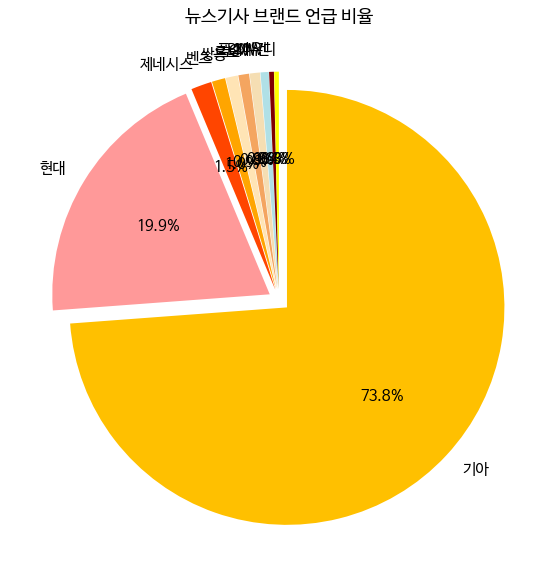

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic')
colors = ['#ffc000','#ff9999','#ff4500','#ffa500','#ffe4b5', '#f4a560', '#f5deb3','#b0e0e6','#800000','#FFFF00']
ax = fig.add_subplot() ## 프레임 생성


plt.title('뉴스기사 브랜드 언급 비율', fontsize = 18)
explode = [0.05 for x in range(len(sorted_uniq_val))]
plt.pie(sorted_val_freq,
        labels = sorted_uniq_val,
        autopct='%.1f%%',
       startangle =90,
       counterclock=False,
       textprops = {'fontsize':15},explode=explode, colors= colors)

# total = np.sum(explode) ## 빈도수 합

# threshold = 5 ## 상한선 비율
# sum_pct = 0 ## 퍼센티지

# bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일

# ## annotation 설정
# config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

# for i,l in enumerate(brand_list):
#     ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
#     center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
#     if i < len(brand_list) - 1:
#         sum_pct += float(f'{explode[i]/brand_list*100:.2f}')
#         text = f'{explode[i]/brand_list*100:.2f}%'
#     else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
#         text = f'{100-sum_pct:.2f}%'
    
#     ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
#     if explode[i]/total*100 < threshold:
#         ang = (ang1+ang2)/2 ## 중심각
#         x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
#         y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
#         ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
#         ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
#         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#         connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
#         config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
#         ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
#                     horizontalalignment=horizontalalignment, **config)
#     else:
#         x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
#         y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
#         ax.text(x,y,text,ha='center',va='center',fontsize=12)
    

plt.show()

In [ ]:
car_model = ['그랜저', '모닝', '카니발', '포터', '쏘나타', 'K5', '아반떼', '쏘렌토', '스파크', '봉고']

In [ ]:
frequency = sorted(zip(car_model,freq_list),key=lambda x: x[1],reverse=True)
#print(frequency)

sorted_uniq_val = [x[0] for x in frequency[:10]]
print(sorted_uniq_val)
sorted_val_freq = [x[1] for x in frequency[:10]]
print(sorted_val_freq)

df = pd.DataFrame(data = list(zip(sorted_uniq_val,sorted_val_freq)), columns = ['sorted_uniq_val','sorted_val_freq'])
df
df.loc[df['sorted_val_freq'] < 326, 'sorted_uniq_val'] = 'etc'


['그랜저', '모닝', '쏘렌토', '쏘나타', '포터', '아반떼', '카니발', 'K5', '봉고', '스파크']
[24235, 6528, 503, 326, 296, 261, 251, 201, 116, 114]


In [ ]:
add_trace(go.Pie(labels=df_inf_case['infection_case'], values=df_inf_case.patient_id, hole=0.3), row=2, col=1)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


([<matplotlib.patches.Wedge at 0x7f8d4ed39450>,
 [Text(0.8428154430177267, -0.7824079044915339, '그랜저'),
  Text(-0.9801868367740035, 0.6014430688061617, '모닝'),
  Text(-0.3917833671509942, 1.0812057127225279, '쏘렌토'),
  Text(-0.3048725818598793, 1.1088519778717496, '쏘나타'),
  Text(-0.2383738528978222, 1.125023513645225, '포터'),
  Text(-0.17810084009955582, 1.1361250330645096, '아반떼'),
  Text(-0.12224700534408921, 1.143484004997185, '카니발'),
  Text(-0.07269035326559711, 1.1477003583436414, 'K5'),
  Text(-0.037848282319289064, 1.1493770084378232, '봉고'),
  Text(-0.012544910923818346, 1.1499315741425284, '스파크')],
 [Text(0.4763739460534976, -0.4422305547126061, '73.8%'),
  Text(-0.5540186468722628, 0.3399460823687001, '19.9%'),
  Text(-0.22144277273751845, 0.6111162724083852, '1.5%'),
  Text(-0.17231928539906216, 0.6267424222753367, '1.0%'),
  Text(-0.1347330472900734, 0.6358828555386054, '0.9%'),
  Text(-0.1006656922301837, 0.6421576273842878, '0.8%'),
  Text(-0.06909613345535476, 0.6463170463027

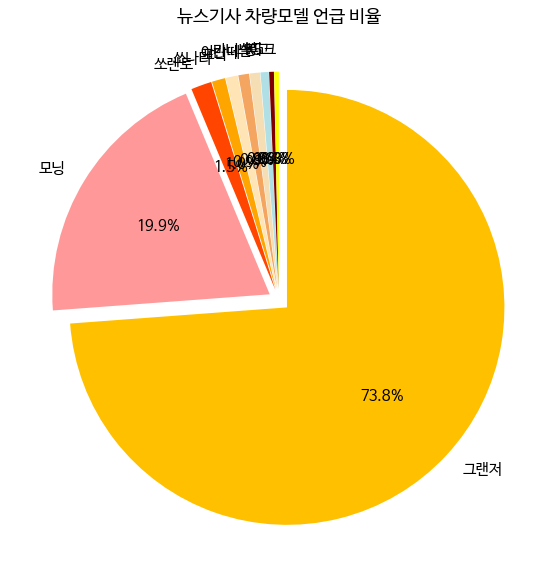

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic')
colors = ['#ffc000','#ff9999','#ff4500','#ffa500','#ffe4b5', '#f4a560', '#f5deb3','#b0e0e6','#800000','#FFFF00']

plt.title('뉴스기사 차량모델 언급 비율', fontsize = 18)
explode = [0.05 for x in range(len(sorted_uniq_val))]
plt.pie(sorted_val_freq,
        labels = sorted_uniq_val,
        autopct='%.1f%%',
       startangle =90,
       counterclock=False,
       textprops = {'fontsize':15},explode=explode, colors= colors)

# 뉴스 기사 전처리